<h1>Logo Recognition</h1>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread("image/asus_icon.png")
img2 = cv2.imread("image/asus_laptop.jpg")

# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<h2>Create SIFT</h2>

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

<h2>Find Keypoint</h2>

In [6]:
keypoints_sift, descriptors = sift.detectAndCompute(img, None)
keypoints_sift2, descriptors2 = sift.detectAndCompute(img2, None)

img = cv2.drawKeypoints(img, keypoints_sift, None)
img2 = cv2.drawKeypoints(img2, keypoints_sift2, None)

cv2.imshow("Image", img)
cv2.imshow("Image2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h2>Matching Keypoint (Brute Force)</h2>

In [11]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors,descriptors2,k=2)

In [12]:
# tes
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

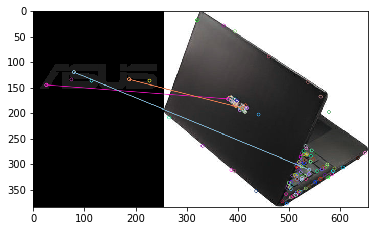

(<matplotlib.image.AxesImage at 0x7f7639e99b38>, None)

In [17]:
img3 = cv2.drawMatchesKnn(img,keypoints_sift,img2,keypoints_sift2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()